In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('./spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5480,ham,Have you seen who's back at Holby?!,NaN,NaN,NaN
5005,ham,ILL B DOWN SOON,NaN,NaN,NaN
3572,spam,You won't believe it but it's true. It's Incre...,NaN,NaN,NaN
1346,ham,Is it ok if I stay the night here? Xavier has ...,NaN,NaN,NaN
2456,ham,Onum ela pa. Normal than.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## STEPS WHICH ARE FOLLOWED IS:
 1. Data cleaning
 2. EDA
 3. Text Preprocessing
 4. Model building
 5. Evaluation
 6. Improvement
 7. Website
 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1965,ham,Thanks. It was only from tescos but quite nice...
1655,ham,At 7 we will go ok na.
5307,ham,What you did in leave.
3506,ham,Two fundamentals of cool life: \Walk
4875,spam,lyricalladie(21/F) is inviting you to be her f...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
582,spam,We tried to contact you re your reply to our o...
2977,ham,Yar lor... Keep raining non stop... Or u wan 2...
746,ham,"I promise to take good care of you, princess. ..."
5035,spam,You won't believe it but it's true. It's Incre...
1970,ham,Nvm it's ok...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

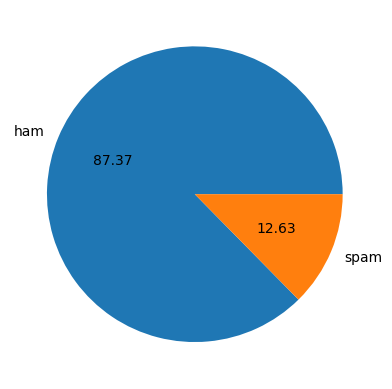

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yashal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

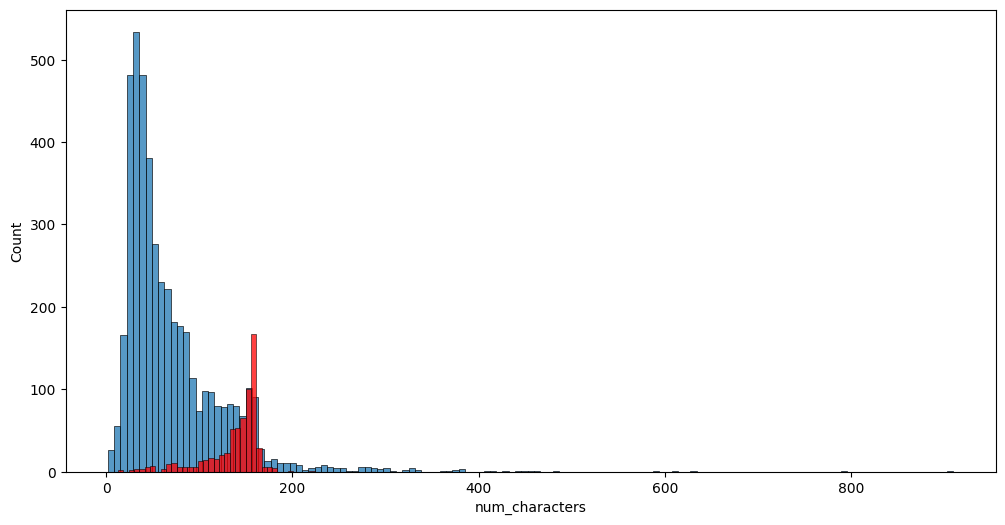

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

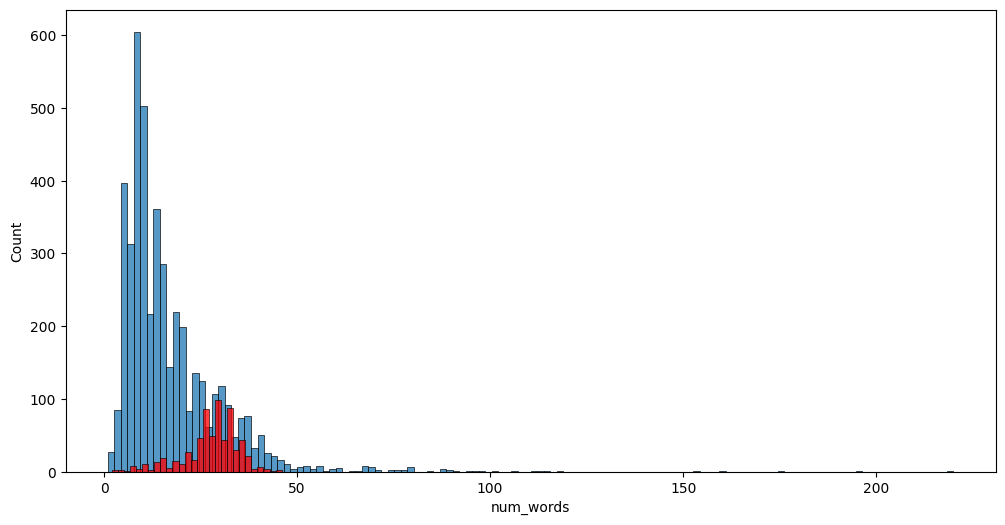

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

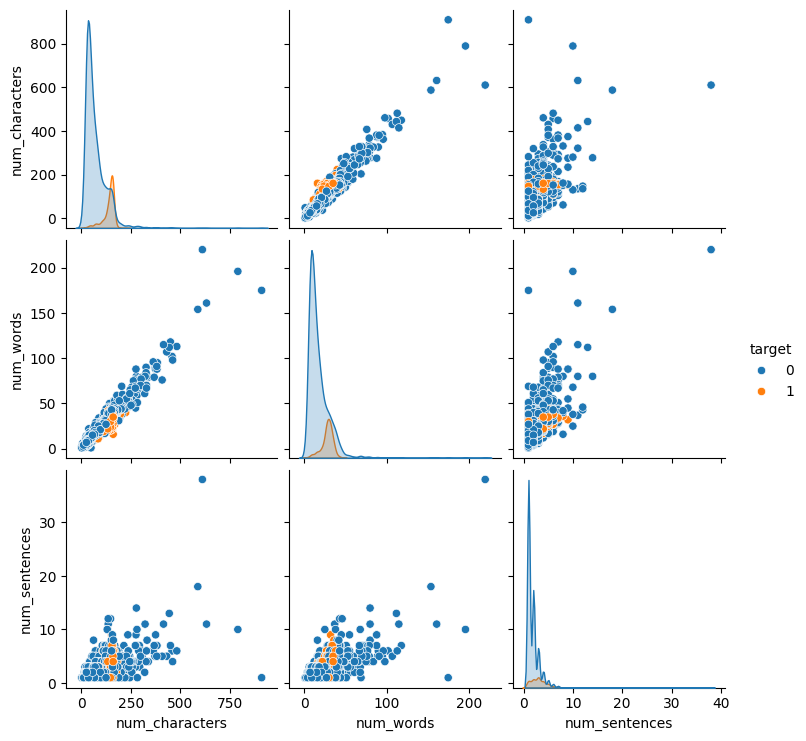

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

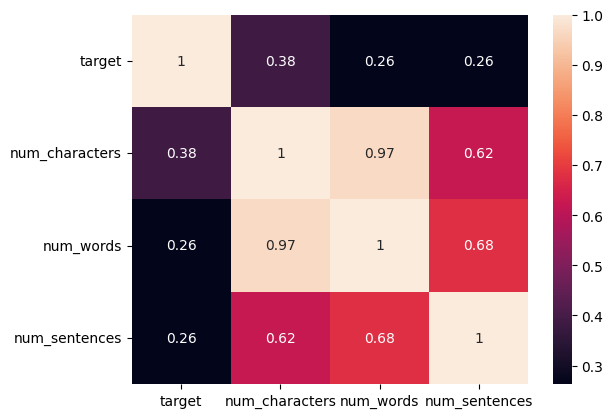

In [39]:
# sns.heatmap(df.corr(),annot=True)
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [40]:

import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)

9939

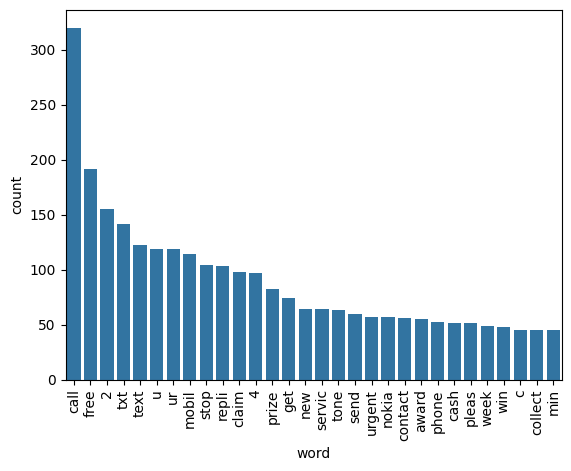

In [53]:
from collections import Counter

counter_data = Counter(spam_corpus).most_common(30)
df_counter = pd.DataFrame(counter_data, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()


In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

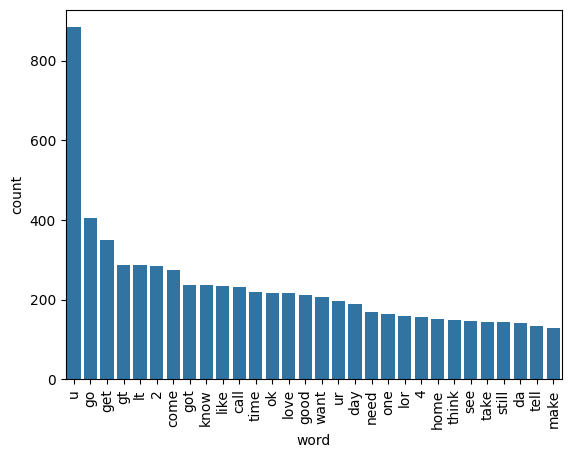

In [57]:
counter_data = Counter(ham_corpus).most_common(30)
df_counter = pd.DataFrame(counter_data, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()


In [58]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## Using Naive Bayes for Spam Email Detection

In spam email detection, different Naive Bayes classifiers can be used based on the data representation:

1. **GaussianNB**:
   - Suitable for continuous data.
   - Assumes features follow a normal distribution.
   - Less common for text data but applicable if features are continuous.

2. **MultinomialNB**:
   - Ideal for text classification.
   - Assumes features (word frequencies) follow a multinomial distribution.
   - Effective with term frequency vectors, commonly used for spam detection.

3. **BernoulliNB**:
   - Used for binary features (presence or absence of words).
   - Assumes features are binary/boolean.
   - Works well with binary text representations.

Each classifier has unique advantages based on data characteristics, making them valuable for different aspects of spam detection.

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## Evaluation of Naive Bayes Classifiers for Spam Email Detection

When evaluating Naive Bayes classifiers for spam email detection, precision and accuracy are crucial metrics. Here’s a comparison of the performance metrics for GaussianNB (gnb), MultinomialNB (mnb), and BernoulliNB (bnb):

### GaussianNB (gnb)
- **Accuracy:** 89.17%
- **Precision:** 56.44%
- **Confusion Matrix:**
  ```
  [[808  88]
   [ 24 114]]
  ```
- **Comments:** While GaussianNB performs reasonably well in terms of accuracy, its precision is relatively low, indicating a higher false positive rate.

### MultinomialNB (mnb)
- **Accuracy:** 97.20%
- **Precision:** 100.00%
- **Confusion Matrix:**
  ```
  [[896   0]
   [ 29 109]]
  ```
- **Comments:** MultinomialNB shows excellent performance with both high accuracy and precision. It correctly predicts most spam emails while minimizing false positives.

### BernoulliNB (bnb)
- **Accuracy:** 98.36%
- **Precision:** 99.19%
- **Confusion Matrix:**
  ```
  [[895   1]
   [ 16 122]]
  ```
- **Comments:** BernoulliNB performs slightly better than MultinomialNB in terms of accuracy but with a slightly lower precision. It still maintains a very high precision score.

### Conclusion
Based on the evaluation metrics—especially precision and accuracy—MultinomialNB (mnb) is the preferred choice for spam email detection in this scenario. It achieves the highest precision score of 100%, indicating that it correctly identifies all positive predictions (spam emails) without any false positives. This high precision is critical in spam detection to minimize the number of legitimate emails incorrectly classified as spam.

# HOW I INPLEMENTED BERNOULLI NAVIE BAYES AND MULTINOMINAL NAIVE BAYES

In [70]:
import numpy as np

class CustomBernoulliNaiveBayes:
    
    def __init__(self, alpha=1):
        self.alpha = alpha
    
    def fit(self, X, y):
        # count number of occurrences for each label
        y_counts = np.unique(y, return_counts=True)[1]
        
        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]
        
        # calculate P(y), the probability of observing any message of class y
        class_prior = y_counts / y_counts.sum()
        self.log_class_prior = np.expand_dims(np.log(class_prior), axis=1)
        
        # calculate P(x|y), the probability of observing message x given it is class y
        prob_x_given_y = np.zeros([self.n_classes, self.n_features])
        
        # for each class of y
        for i in range(self.n_classes):
            # select only rows of class y
            row_mask = (y == i)
            X_filtered = X[row_mask, :]
            
            # get number of messages of each word appears in (P(x and y))
            numerator = (X_filtered.sum(axis=0) + self.alpha)
            
            # get number of messages in class y (scalar) (P(y))
            denominator = (X_filtered.shape[0] + 2 * self.alpha)
            
            # P(x|y) = P(x and y) / P(y)
            prob_x_given_y[i, :] = numerator / denominator
            
        # Calculate log probabilities for P(x|y) and P(~x|y)
        self.log_class_conditional_positive = np.log(prob_x_given_y)  # k x n matrix
        self.log_class_conditional_negative = np.log(1 - prob_x_given_y)  # k x n matrix
            
    def predict(self, X):
        log_probs_positive = self.log_class_conditional_positive.dot(X.T)  # n x m matrix
        log_probs_negative = self.log_class_conditional_negative.dot(1 - X.T)  # n x m matrix        
        log_likelihoods = log_probs_positive + log_probs_negative  # n x m matrix
        log_joint_likelihoods = log_likelihoods + self.log_class_prior  # n x m matrix
        
        # for each column vector, find class y that maximizes P(y|x)
        preds = np.argmax(log_joint_likelihoods, axis=0)  # 1 x m matrix
        preds = np.array(preds).squeeze()  # m-dimensional vector
        return preds




In [71]:
class CustomMultinomialNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probs = np.zeros(len(self.classes))
        self.feature_probs = np.zeros((len(self.classes), X.shape[1]))

        for i, c in enumerate(self.classes):
            class_mask = (y == c)
            self.class_probs[i] = np.sum(class_mask) / len(y)

            # Calculate the probability of each feature given the class using Laplace smoothing
            feature_probs_class = np.sum(X[class_mask], axis=0)
            self.feature_probs[i] = (feature_probs_class + 1) / (np.sum(class_mask) + X.shape[1])  # Laplace smoothing

    def evaluate_precision(self, y_true, y_pred):
        precision = np.zeros(len(self.classes))

        for i, c in enumerate(self.classes):
            true_positives = np.sum((y_true == c) & (y_pred == c))
            false_positives = np.sum((y_true != c) & (y_pred == c))

            if true_positives + false_positives == 0:
                precision[i] = 0  # Handle the case where precision is undefined
            else:
                precision[i] = true_positives / (true_positives + false_positives)

        return precision
    def predict(self, X):
        predictions = []

        for x in X:
            class_scores = np.zeros(len(self.classes))

            for i, c in enumerate(self.classes):
                # Calculate the log-likelihood of the features given the class
                feature_probs_class = self.feature_probs[i]
                log_likelihood = np.sum(np.log(feature_probs_class[x.astype(bool)]))  # Corrected line

                # Calculate the log-probability of the class given the features
                class_scores[i] = np.log(self.class_probs[i]) + log_likelihood

            # Choose the class with the highest log-probability
            predicted_class = self.classes[np.argmax(class_scores)]
            predictions.append(predicted_class)

        return np.array(predictions)

In [72]:


# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression class
class CustomLogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)



In [73]:
cmnb = CustomMultinomialNaiveBayes()
cmnb.fit(X_train, y_train)
y_pred2 = cmnb.predict(X_test)

# Evaluate the model
accuracy = np.sum(y_pred2 == y_test) / len(y_test)
print("Accuracy:", accuracy)

precision = cmnb.evaluate_precision(y_test, y_pred2)
print("Precision for each class:", precision)

Accuracy: 0.9738878143133463
Precision for each class: [0.97176982 0.99115044]


In [74]:
cbnb = CustomBernoulliNaiveBayes(alpha=0.001)
cbnb.fit(X_train, y_train)
y_pred = cbnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' to calculate precision for each class, and then take the average

print('Test accuracy:', accuracy)
print('Test precision:', precision)

Test accuracy: 0.9777562862669246
Test precision: 0.9801212288193966


In [75]:
# Use the custom Logistic Regression model
log_reg = CustomLogisticRegression(lr=0.01, n_iters=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the custom Logistic Regression model
log_reg_accuracy = np.mean(y_pred_log_reg == y_test)
print("Custom Logistic Regression Accuracy:", log_reg_accuracy)

# Classification report
from sklearn.metrics import classification_report

log_reg_classification_report = classification_report(y_test, y_pred_log_reg)
print("Custom Logistic Regression Classification Report:\n", log_reg_classification_report)

Custom Logistic Regression Accuracy: 0.8665377176015474
Custom Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.00      0.00      0.00       138

    accuracy                           0.87      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.75      0.87      0.80      1034



/home/yashal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yashal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yashal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Analysis of Both the code of Multinomial Naive Bayesian:
### With or Without Using Library
if you observe that the accuracy and precision of the manually implemented algorithms or classifier are lower compared to the library implementation, it's essential to consider various factors that might contribute to this difference.

While manual implementations are valuable for learning and understanding algorithms, library implementations are often preferred for real-world applications due to their efficiency, reliability, and extensive optimizations. Analyzing the performance of both implementations helps you gain insights into the strengths and weaknesses of your manual implementation and appreciate the benefits provided by well-established libraries.

#### Multinomial Naive Bayesian
With Python Package:
- **Accuracy:**  0.9709864603481625
- **Precision:** 1.0

Without Python Package:
- **Accuracy:** 0.9709864603481625
- **Precision:** 0.98

#### Bernoulli Naive Bayesian
 With Python Package:
- **Accuracy:** 97.20%
- **Precision:** 100.00%

Without Python Package:
- **Accuracy:**  0.9777562862669246
- **Precision:** 0.9801212288193966

#### Logistic Regression
With Python Package:
- **Accuracy:**  0.9555125725338491
 
 Without Python Package:
- **Accuracy:**  0.8665377176015474


In [76]:
# tfidf --> MNB

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 

}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739


In [83]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
4,LR,0.955513,0.960000
3,DT,0.930368,0.830000


In [85]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [86]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.955513
5,DT,Accuracy,0.930368
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,0.982609
9,SVC,Precision,0.974790


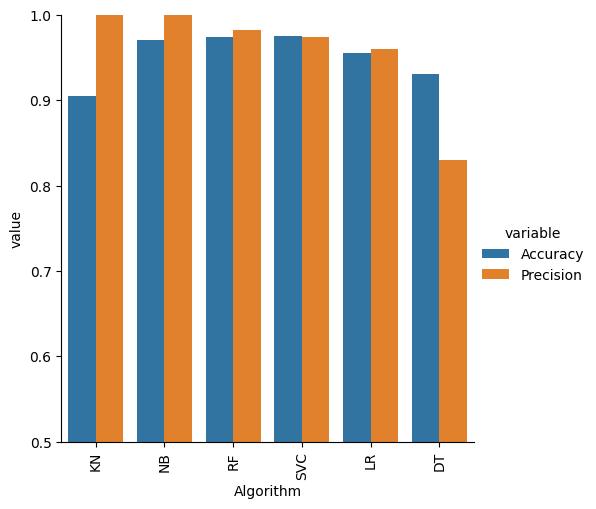

In [87]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [91]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [92]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [94]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
5,DT,0.930368,0.830000,0.930368,0.830000,0.930368,0.830000,0.930368,0.830000


In [95]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()


from sklearn.ensemble import VotingClassifier

In [96]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb)],voting='soft')

In [97]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [98]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9752066115702479


In [99]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb)]
final_estimator=RandomForestClassifier()

In [100]:
from sklearn.ensemble import StackingClassifier

In [101]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [102]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9609375


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))